# Visualizing dyad.

### 1.1) Load the image into memory and compute its SVD

(512, 512) (512,) (512, 512)


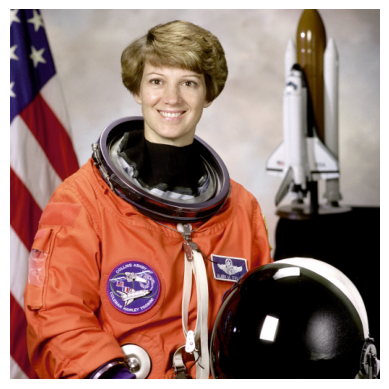

In [4]:
import numpy as np
from skimage import data
from matplotlib import pyplot as plt
import seaborn as sns

# Load the image
X = data.astronaut() 
X_gray = np.mean(X, axis=-1) # for grayscale (0 or 1)

# Compute SVD
U, S, Vt = np.linalg.svd(X_gray, full_matrices=False)
print(U.shape, S.shape, Vt.shape)

# Plot the image
plt.imshow(X)
plt.axis('off')
plt.show()

### 1.2) Visualize some of the dyad $σ_i*u_i*v_i^T$ of this decomposition. What do you notice?

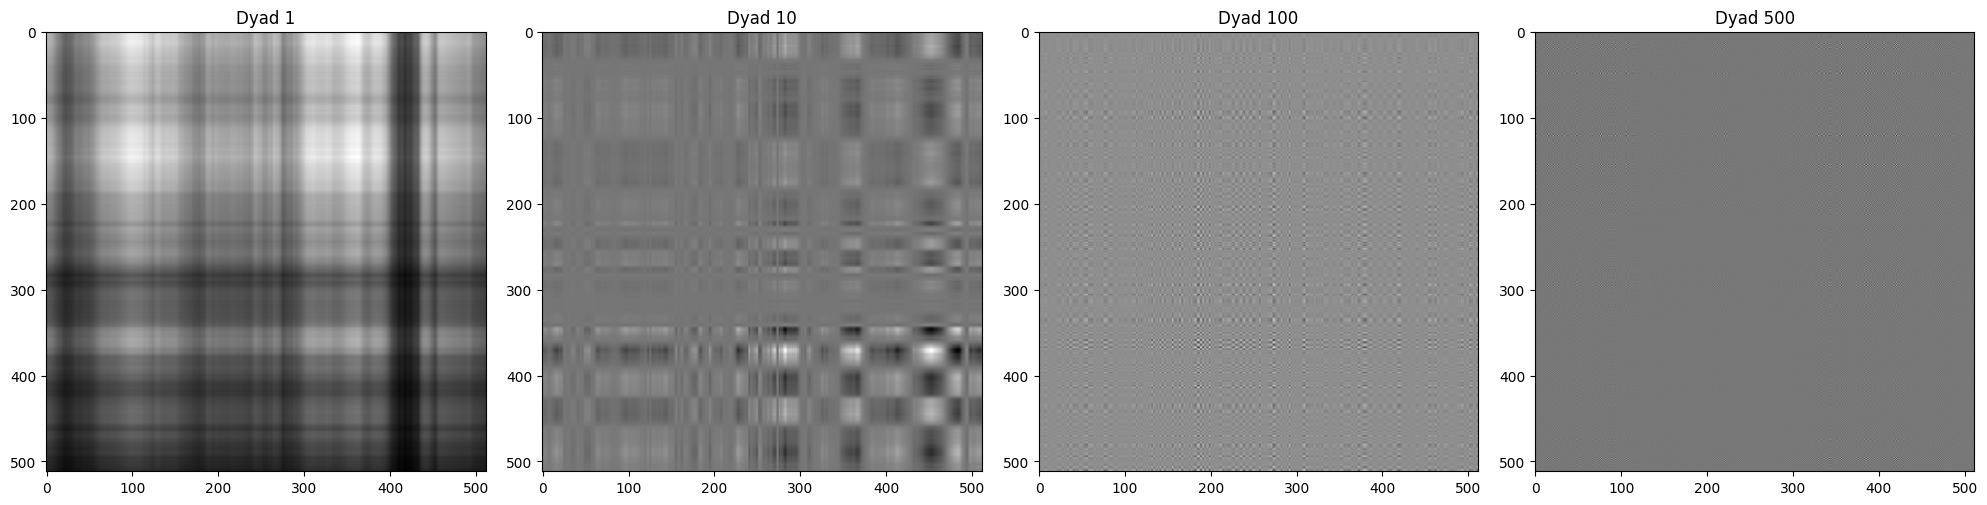

In [2]:
selected_singular_values = [1, 10, 100, 500] # the dyads we'll plot
plt.figure(figsize=(20,10))
for i, sigma_idx in enumerate(selected_singular_values, 1):
    # Reconstruct dyad
    dyad_reconstructed = np.outer(U[:, sigma_idx - 1] * S[sigma_idx - 1], Vt[sigma_idx - 1, :])

    # Plot
    plt.subplot(1, len(selected_singular_values), i)
    plt.imshow(dyad_reconstructed, cmap='gray')
    plt.title(f'Dyad {sigma_idx}')

plt.tight_layout()
plt.show()

**We can notice that the bigger the index of the dyad, the less relevant it is in terms of information.**

### 1.3) Plot the singular values of $X$. Do you note something?

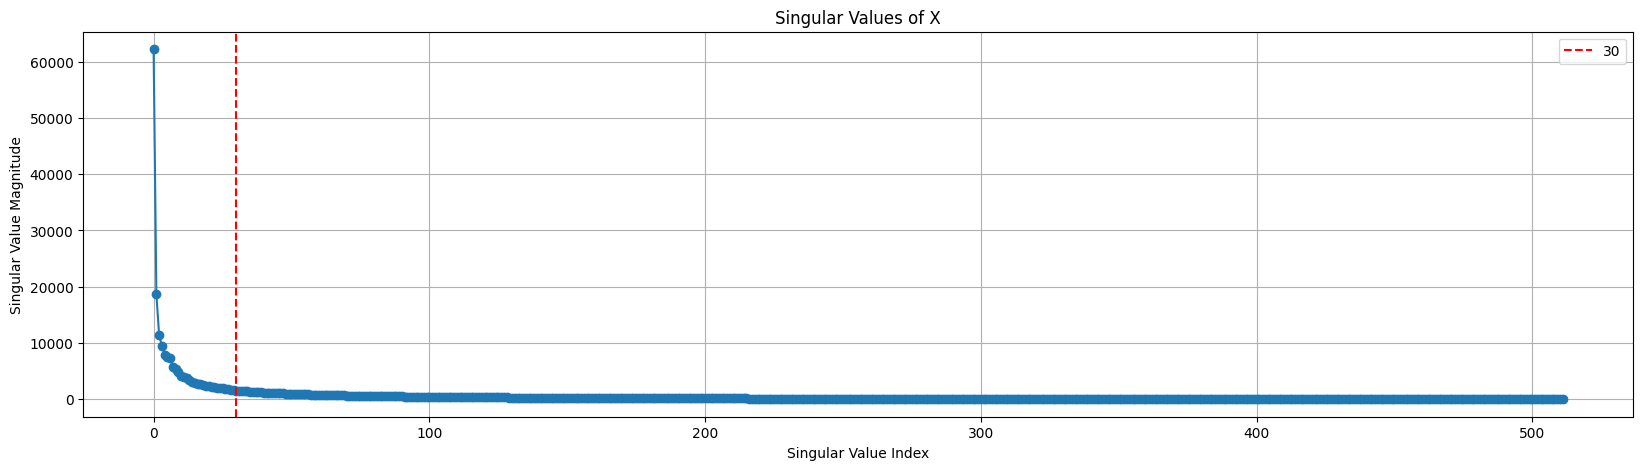

In [3]:
# Plot the singular values
plt.figure(figsize=(20,5))
plt.plot(S, marker='o')
plt.title('Singular Values of X')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value Magnitude')
plt.axvline(x=30, color='r', linestyle='--', label='30')
plt.grid(True)
plt.legend()
plt.show()

1. **We can observe taht the slope is constantly descendig, so that means that a point will always be more relevant than the netx one.**

2. **We can observe that the slope decrease repidly, meaning that the very first points are much more relevant than all the other**

3. These observations make clear why we could select just the very first 30 values and we won't loose that much information.

### 1.4) Visualize the k-rank approximation of $X$ for different values of $k$. What do you observe?

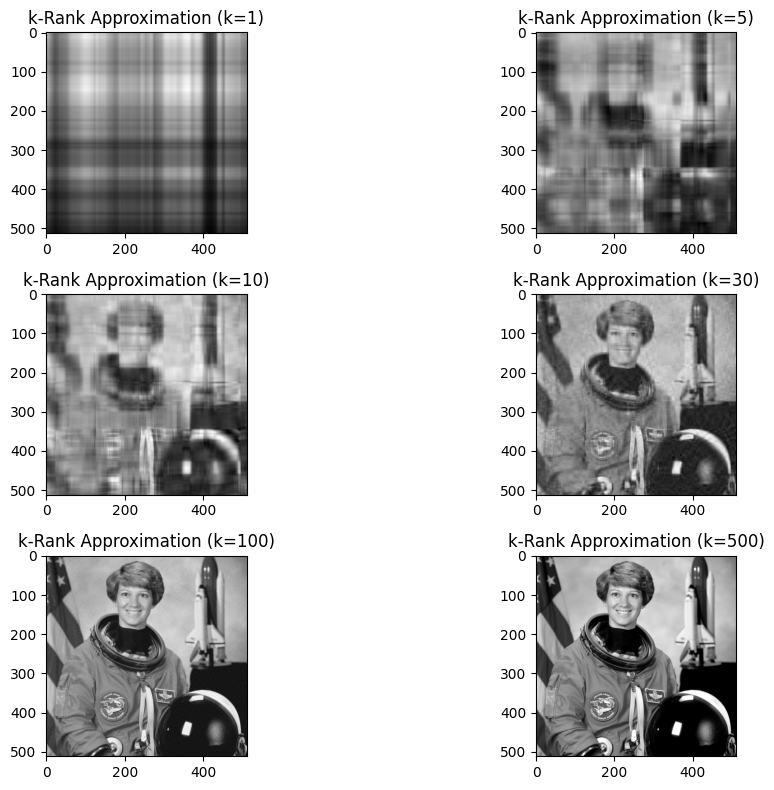

In [4]:
# Values of k (number of retained singular values)
k_values = [1, 5, 10, 30, 100, 500]

# Visualize k-rank approximations
plt.figure(figsize=(12, 8))

for i, k in enumerate(k_values, 1):
    # k-rank approximation
    X_approx = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]

    # Plot
    plt.subplot(3, 2, i)
    plt.imshow(X_approx, cmap='gray')
    plt.title(f'k-Rank Approximation (k={k})')

plt.tight_layout()
plt.show()

**We can observe that the very first k-approximations can produce a really representative image and when we have 30 values we can't see so much differences from the next ones (as observed before).**

### 1.5) Compute and plot the approximation error $||X −X_k||_F$ for increasing values of $k$, where $X_k$ is the k-rank approximation of $k$.

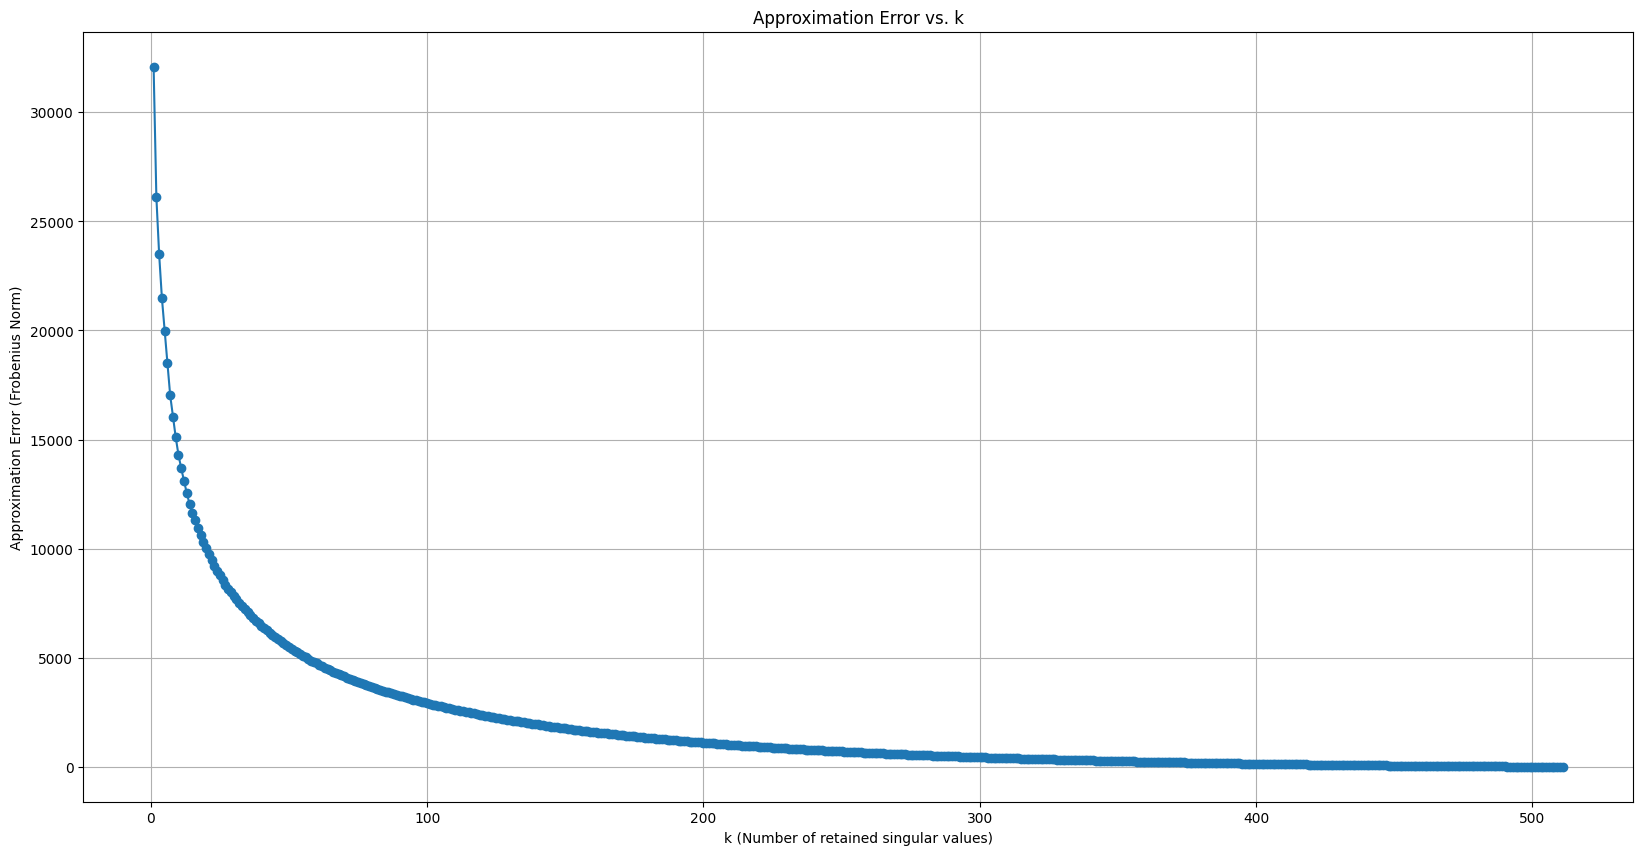

In [5]:
# Values of k (number of retained singular values)
k_values = np.arange(1, min(X_gray.shape))

# Compute and plot approximation errors
approximation_errors = []

for k in k_values:
    # k-rank approximation
    Xk = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]

    # Frobenius norm of the difference
    error = np.linalg.norm(X_gray - Xk, 'fro')
    approximation_errors.append(error)

# Plot the approximation errors
plt.figure(figsize=(20,10))
plt.plot(k_values, approximation_errors, marker='o')
plt.title('Approximation Error vs. k')
plt.xlabel('k (Number of retained singular values)')
plt.ylabel('Approximation Error (Frobenius Norm)')
plt.grid(True)
plt.show()

### 1.6) Plot the compression factor $c_k = 1 −\frac{k(m+n+1)}{mn}$ for increasing $k$. 
What is the approximation error when the compressed image requires the same amount of informations of those of the uncompressed image (i.e. $ck = 0$)? 

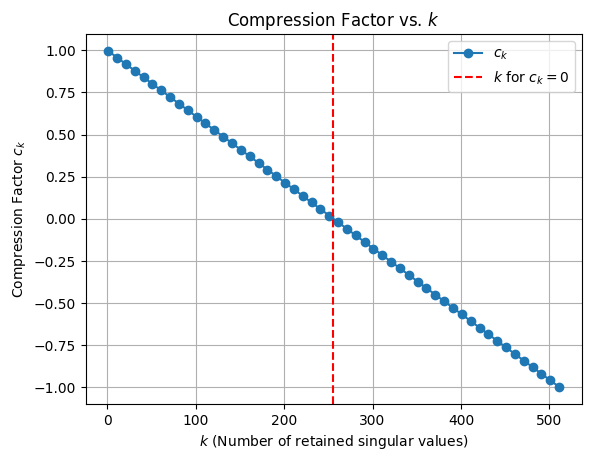

We have c_k=0 with k=255


In [6]:
# Values of k (number of retained singular values)
m, n = X_gray.shape
k_values = np.arange(1, min(m, n), 10) # min() to be sure we stay in the matrix

# Compute compression factor ck
compression_factors = [1 - k * (m + n + 1) / (m * n) for k in k_values]

# Find k where ck = 0 -> no compression (all singular values are retained, and the approximation is exact)
k_zero_compression = int((m * n) / (m + n + 1))

# Plot compression factors
plt.plot(k_values, compression_factors, marker='o', label=r'$c_k$')
plt.axvline(x=k_zero_compression, color='r', linestyle='--', label=r'$k$ for $c_k=0$')
plt.title(r'Compression Factor vs. $k$')
plt.xlabel(r'$k$ (Number of retained singular values)')
plt.ylabel(r'Compression Factor $c_k$')
plt.legend()
plt.grid(True)
plt.show()

# Print k where ck = 0
print(f'We have c_k=0 with k={k_zero_compression}')

In [7]:
# k-rank approximation for c_k=0
Xk_zero_compression = U[:, :k_zero_compression] @ np.diag(S[:k_zero_compression]) @ Vt[:k_zero_compression, :]

# Approximation error for c_k=0
approximation_error_zero_compression = np.linalg.norm(X_gray - Xk_zero_compression, 'fro')

# Print the approximation error
print(f'Approximation Error for c_k=0: {approximation_error_zero_compression}')

Approximation Error for c_k=0: 669.5031698917187


# Classification of MNIST Digits with SVD Decomposition.

### 1.1) Load the MNIST dataset contained in ./data/MNIST.mat with the function `scipy.io.loadmat`.
This dataset, which is loaded in the form of a 256 ×1707 matrix $X$, contains the flattened version of 1707 16 ×16 grayscale handwritten digits. Moreover, from the same file it is possible to load a vector $I$ of length 1707 such that the i-th element of $I$ is the true digit represented by the i-th image of $X$

In [8]:
import scipy as sp
import numpy as np
dataset = sp.io.loadmat('./MNIST.mat')
X = np.array(dataset['X']) # 1707 images
Y = np.array(dataset['I'][0]) # 1707 labels

### 1.2) Visualize a bunch of datapoints of $X$ with the function `plt.imshow`

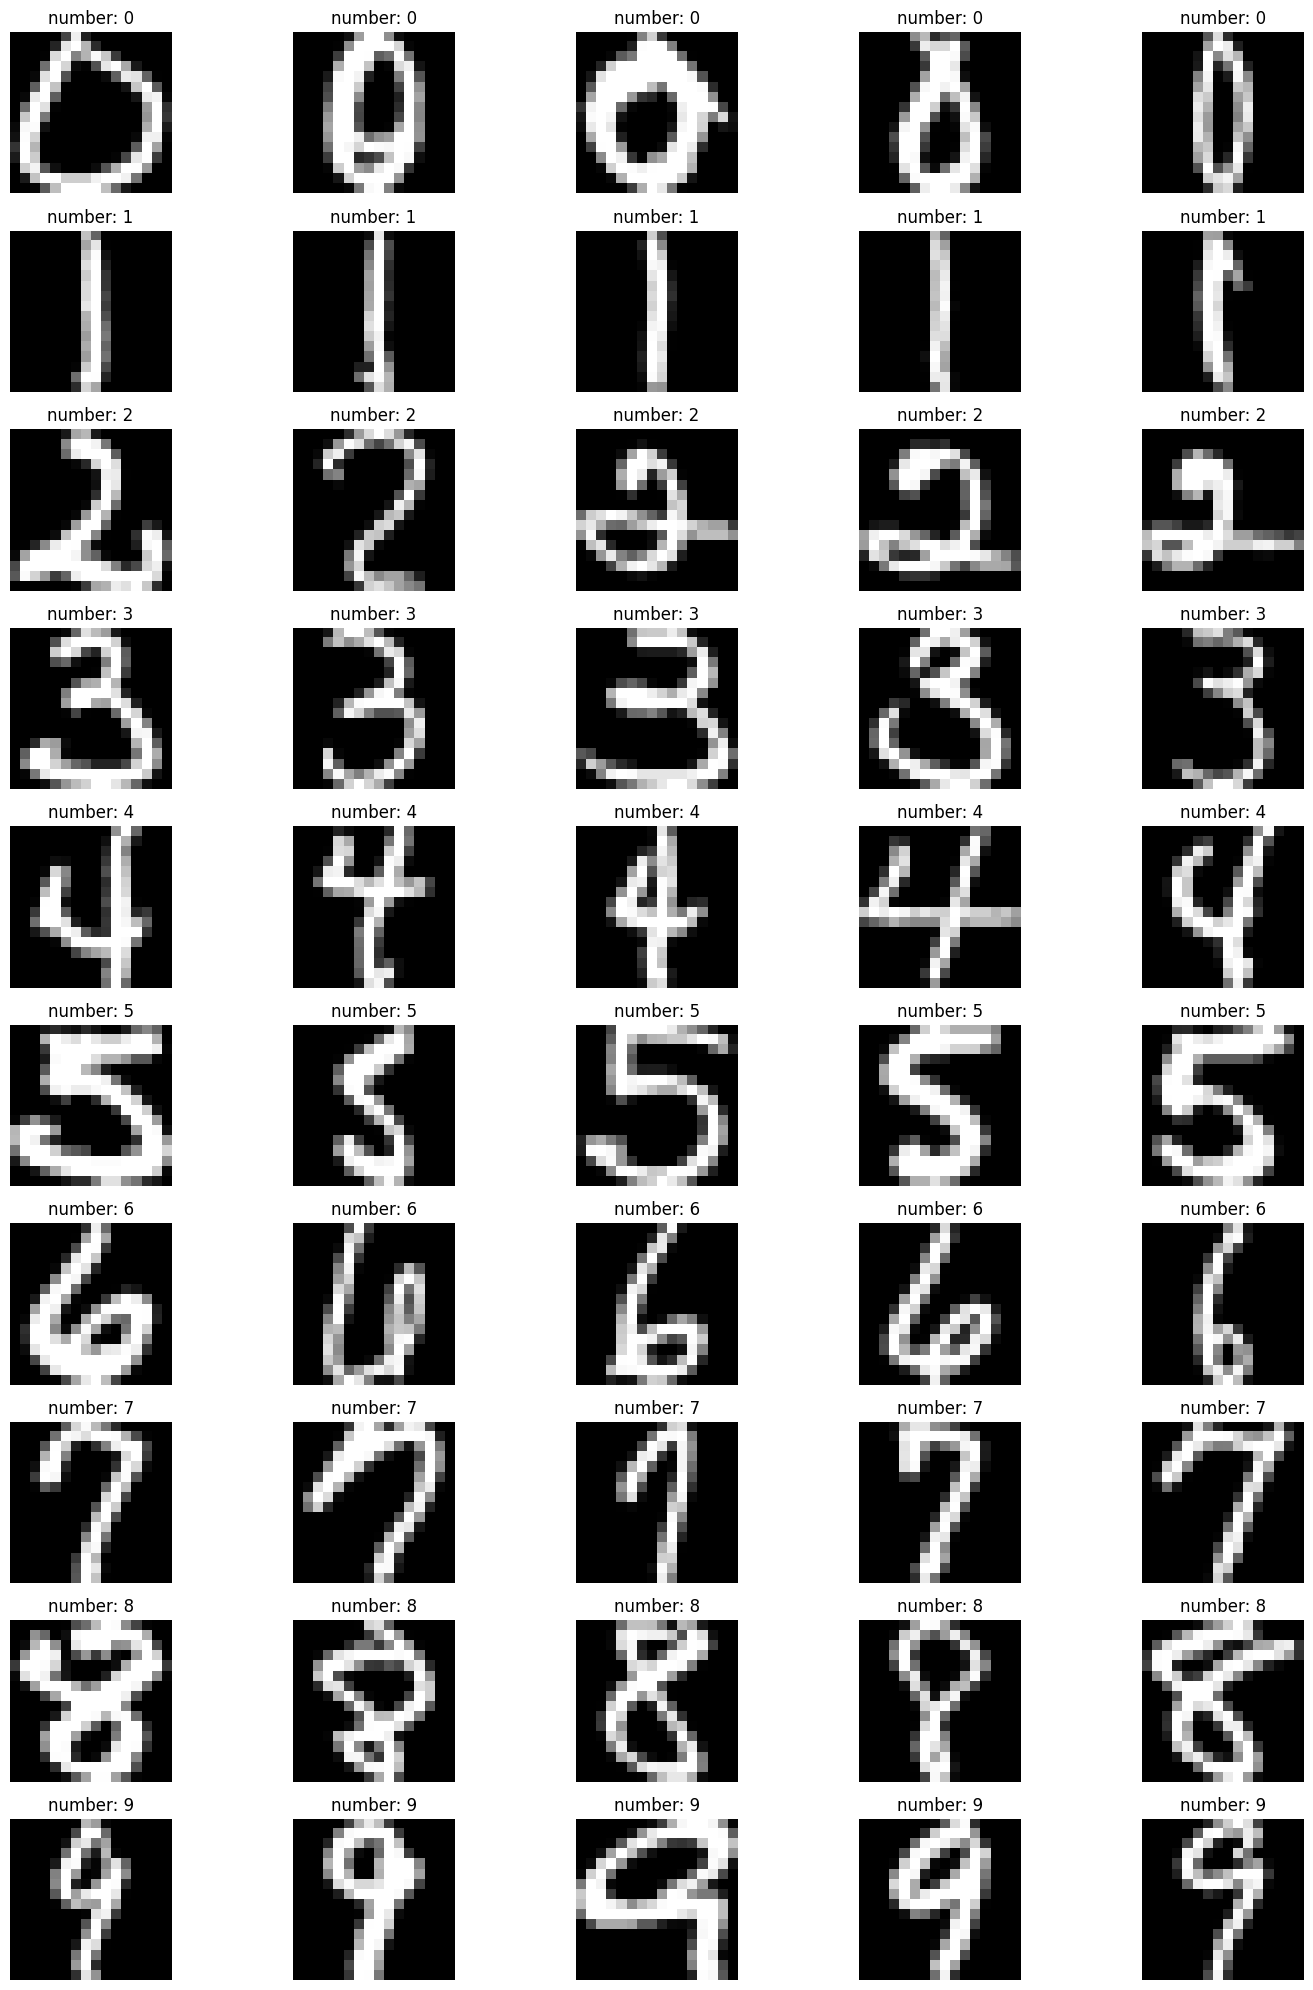

In [9]:
import matplotlib.pyplot as plt

count = 1
plt.figure(figsize=(15,20))
for digit in range(0, 10):
    idxs = np.where(Y == digit)[0][:5] # i take the first 5 images of digit
    for idx in idxs :
        plt.subplot(10, 5, count)
        image = X[:,idx]
        image = np.reshape(image, (16, 16))
        plt.imshow(image, cmap='gray')
        plt.title(f"number: {digit}")
        plt.axis('off')
        count += 1
plt.tight_layout()
plt.show()

### 1.3) Extract from $X$ those columns that corresponds to digits 3 or 4. Those digits represents the classes $C_1$ and $C_2$ defined above.

In [10]:
idxs = np.where((Y == 3) | (Y == 4))[0]
X = X[:, idxs]
Y = Y[idxs]

### 1.4) Split the obtained dataset in training and testing. 
**From now on, we will only consider the training set.**

The test set will be only used at the end of the exercise to test the algorithm.

In [11]:
def train_test_split (X, Y, N, N_train) :
    idx = np.arange(0, N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    X_train = X[:, train_idx]
    Y_train = Y[train_idx]

    X_test = X[:, test_idx]
    Y_test = Y[test_idx]
    return X_train, X_test, Y_train, Y_test


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, X.shape[1], 150)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(256, 150) (256, 103)
(150,) (103,)


### 1.5) Create the matrices $X_1$ and $X_2$ defined above from $X$

In [12]:
# They are already flatten
X1 = X_train[:, (Y_train == 3)]
X2 = X_train[:, (Y_train == 4)]
print(X1.shape, X2.shape)

(256, 76) (256, 74)


### 1.6) Compute the SVD decomposition of $X_1$ and $X_2$ with `np.linalg.svd(matrix, full matrices=False)` and denote the U-part of the two decompositions as $U_1$ and $U_2$

In [13]:
U1, s1, VT1 = np.linalg.svd(X1, full_matrices = False)
U2, s2, VT2 = np.linalg.svd(X2, full_matrices = False)

### 1.7) Take an unknown digit y from the test set, and compute $y_1^⊥ = U_1(U^T_1 y)$ and $y_2^⊥ = U_2(U^T_2 y)$

In [14]:
# random_index = np.random.randint(0, Y.shape[0])
random_index = 31 # for debug purpose

random_digit = Y_test[random_index]
y = X_test[:, random_index]
y1 = U1 @ (U1.T @ y)
y2 = U2 @ (U2.T @ y)

### 1.8) Compute the distances $d1 = ||y −y^⊥_1 ||2$ and $d2 = ||y −y^⊥_2 ||2$ and classify $y$ to $C_1$ if $d_1 < d_2$ and to $C_2$ if $d_2 < d_1$

y is C2 (number 4)


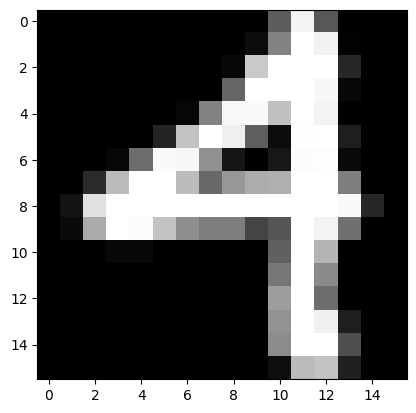

In [15]:
d1 = np.linalg.norm(y-y1, 2)
d2 = np.linalg.norm(y-y2, 2)

# Output
if d1 < d2 : print("y is C1 (number 3)")
else : print("y is C2 (number 4)")
plt.imshow(np.reshape(y, (16,16)),cmap='grey') # to check visually the prediction

### 1.9) Repeat the experiment for different values of $y$ in the test set. Compute the misclassification number for this algorithm

In [16]:
def experiment(U1, U2, X, Y, C1, C2) :
    misclassifications = 0
    
    for i in range(Y.shape[0]) :
        y = X[:, i]
        plt.imshow(np.reshape(y, (16,16)),cmap='grey')
        y1 = U1 @ (U1.T @ y)
        y2 = U2 @ (U2.T @ y)
        d1 = np.linalg.norm(y - y1, 2)
        d2 = np.linalg.norm(y - y2, 2)
        if (d1 < d2) & (Y[i] == C2):
            misclassifications += 1
        elif (d1 > d2) & (Y[i] == C1):
            misclassifications += 1
    return misclassifications/Y.shape[0] * 100.0

The missclassification for train set is 0.0%
The missclassification for test set is 0.9708737864077669%


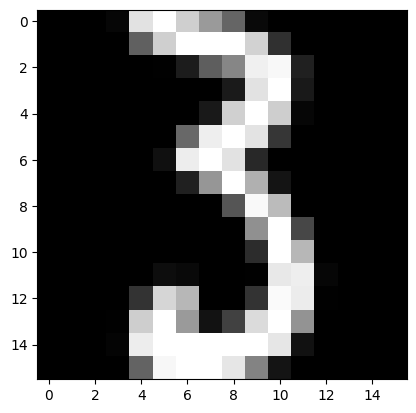

In [17]:
# Compute misclassification for train set
mis_train = experiment(U1, U2, X_train, Y_train, 3, 4)
print(f"The missclassification for train set is {mis_train}%")

# Compute misclassification for test set
mis_test = experiment(U1, U2, X_test, Y_test, 3, 4)
print(f"The missclassification for test set is {mis_test}%")

### 1.10) Repeat the experiment for different digits other than 3 or 4. There is a relationship between the visual similarity of the digits and the classification error?

In [18]:
def generalized_digits_experiment(n1, n2, train_size, X, Y) :
    idx = (Y == n1) | (Y == n2)
    X = X[:, idx]
    Y = Y[idx]
    
    d, N = X.shape
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, N, int(N * train_size))
    
    idx = (Y_train == n1)
    X1 = X_train[:, idx]
    idx = (Y_train == n2)
    X2 = X_train[:, idx]

    U1, s1, VT1 = np.linalg.svd(X1, full_matrices = False)
    U2, s2, VT2 = np.linalg.svd(X2, full_matrices = False)

    mis_number = experiment(U1, U2, X_test, Y_test, n1, n2)
    return mis_number

Average misclassification along the experiment: 8.04%


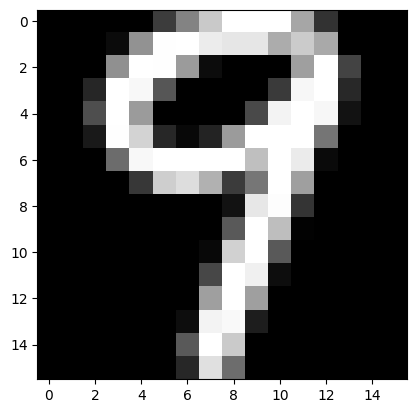

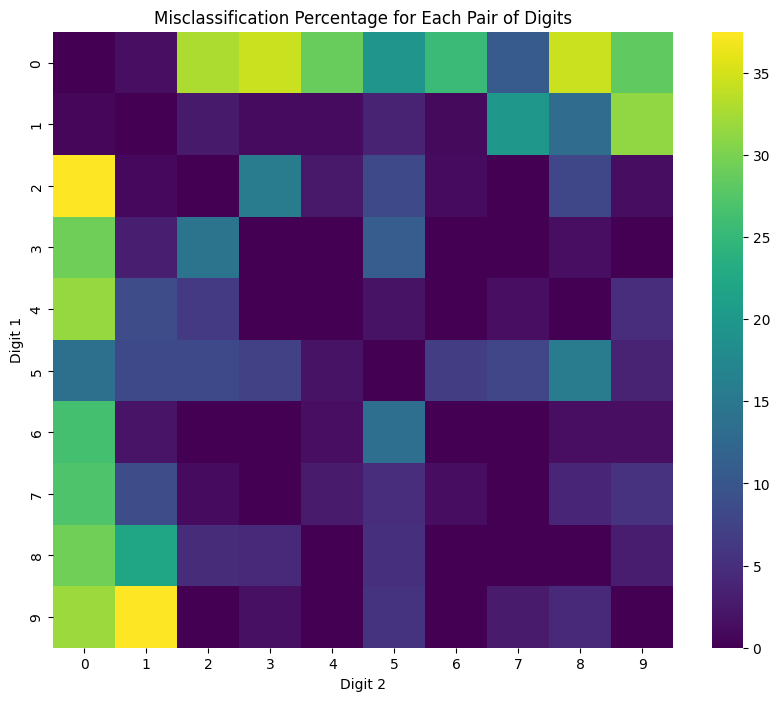

In [19]:
# Reload the dataset
dataset = sp.io.loadmat('./MNIST.mat')
X = np.array(dataset['X']) # 1707 images
Y = np.array(dataset['I'][0]) # 1707 labels

misclassification_matrix = np.zeros((10, 10))

for digit1 in range(10):
    for digit2 in range(10):
        mis_test_d1_d2 = generalized_digits_experiment(digit1, digit2, 0.75, X, Y)
        misclassification_matrix[digit1, digit2] = mis_test_d1_d2

print(f"Average misclassification along the experiment: {np.mean(misclassification_matrix):.2f}%")
plt.figure(figsize=(10, 8))
sns.heatmap(misclassification_matrix, fmt=".2f", cmap="viridis")
plt.xlabel('Digit 2')
plt.ylabel('Digit 1')
plt.title('Misclassification Percentage for Each Pair of Digits')
plt.show()

### 1.11) Comment the obtained results.

**We can notice that the most misclassified digit is 0, while the others are anyway not more misclassified than 40%. The averege misclassification quite low (8%)**

### 2) Repeat the exercise above with a 3-digit example. Comment the differences.

In [20]:
def classify(U, X, Y) :
    # Da finire
    misclassifications = 0
    
    for i in range(Y.shape[0]) :
        y = X[:, i]

        # I have to consider the distances from y to all the possible classes
        distances = {} 

        # Compute the distances
        for n in U.keys():
            U_k = U[n]
            y_k = U_k @ (U_k.T @ y)
            distances[n] = np.linalg.norm(y - y_k)
        predicted = min(distances, key=distances.get)

        # Verify result
        if predicted != Y[i] : misclassifications += 1

    return misclassifications/Y.shape[0] * 100.0

In [21]:
def generalized_experiment(numbers, train_size, X, Y) :
    idx = np.isin(Y, numbers)
    X = X[:, idx]
    Y = Y[idx]
    d, N = X.shape
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, N, int(N * train_size))

    U = {}
    for n in numbers:
        idx = (Y_train == n)
        X_k = X_train[:, idx]
        U_k, sk, VTk = np.linalg.svd(X_k, full_matrices = False)
        U[n] = U_k
    
    return classify(U, X_test, Y_test)


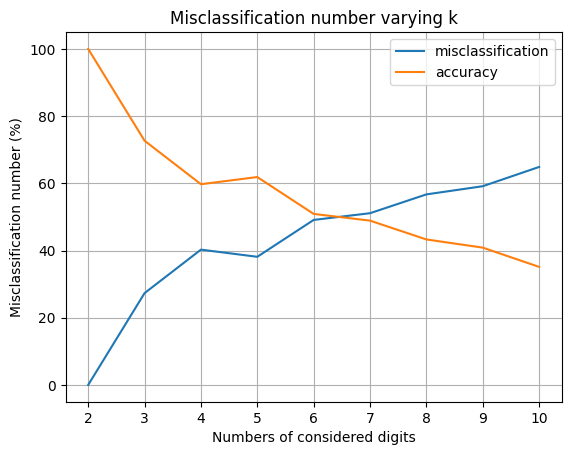

In [24]:
# Reload the dataset
dataset = sp.io.loadmat('./MNIST.mat')
X = np.array(dataset['X']) # 1707 images
Y = np.array(dataset['I'][0]) # 1707 labels

ks = {k+1:list(range(0,k+1)) for k in range(1,10)}
misclassifications = []
for k,digits in ks.items() :
    misclassifications.append(generalized_experiment(digits, 0.75, X, Y))
    
plt.xlabel('Numbers of considered digits')
plt.ylabel('Misclassification number (%)')
plt.grid()
plt.title('Misclassification number varying k')

plt.plot(list(ks.keys()), misclassifications, label="misclassification")
plt.plot(list(ks.keys()), [100-n for n in misclassifications], label="accuracy")
plt.legend()

plt.show()

Combination 0 : (0, 1, 2)


Combination 1 : (1, 2, 0)
Combination 2 : (2, 1, 0)


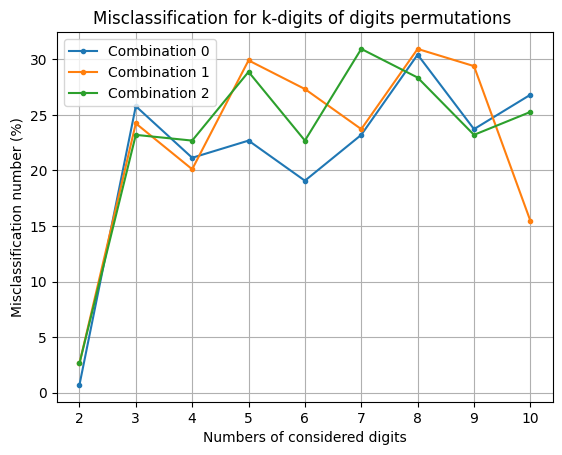

In [27]:
from itertools import permutations
import random
k=3
# digits = list(range(0, 10))
digits = list(range(0, k))
all_perms = list(permutations(digits)) 

# over 3 millions, we prune randomly for readibility
random_permutations = random.sample(all_perms, k)
i = 0
for perm in random_permutations :
    print(f"Combination {i} : {perm}") # for readibility
    ks = {k + 1: perm[:k + 1] for k in range(1, 10)}
    misclassifications = []
    
    for k, digits in ks.items():
        misclassifications.append(generalized_experiment(digits, 0.75, X, Y))
    
    plt.plot(list(range(2,11)), misclassifications, '.-', label=f'Combination {i}')
    i += 1

plt.xlabel('Numbers of considered digits')
plt.ylabel('Misclassification number (%)')
plt.legend()
plt.grid()
plt.title('Misclassification for k-digits of digits permutations ')
plt.show()

**As we can see, the errors in general increases the more classes we consider**

# Clustering with PCA

### 1.1) Load the dataset in memory and explore its head and shape to understand how the informations are placed inside of it

In [47]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('./data.csv')
display(dataset.head())
display(dataset.shape)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 785)

### 1.2) Split the dataset into the $X$ matrix of dimension $d \times N$, with $d = 784$ being the dimension of each datum, $N$ is the number of datapoints, and $Y \in \mathbb{R}^N$ containing the corresponding labels

In [48]:
dataset = np.array(dataset)
X = dataset[:, 1:].T
Y = dataset[:, 0].T
d, N = X.shape

### 1.3) Choose a number of digits (for example, 0, 6 and 9) and extract from $X$ and $Y$ the sub-dataset containing only the considered digits. Re-call $X$ and $Y$ those datasets, since the originals are not required anymore

In [49]:
digits = [0, 6, 9]
idx = np.isin(Y,digits)
Y = Y[idx]
X = X[:, idx]
d, N = X.shape
print(X.shape, Y.shape)

(784, 12457) (12457,)


### 1.4) Set $N_{train} < N$ and randomly sample a training set with $N_{train}$ datapoints from $X$ (and the corresponding $Y$ ). Call them $X_{train}$ and $Y_{train}$. Everything else is the test set. Call it $X_{test}$ and $Y_{test}$.

In [50]:
def train_test_split (X, Y, N, train_perc) :
    N_train = int(X.shape[1]*train_perc)
    
    idx = np.arange(0, N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    X_train = X[:, train_idx]
    Y_train = Y[train_idx]

    X_test = X[:, test_idx]
    Y_test = Y[test_idx]
    return X_train, X_test, Y_train, Y_test

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, N, 0.75)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(784, 9342) (784, 3115)
(9342,) (3115,)


### 1.5) Implement the algorithms computing the PCA of $X_{train}$ with a fixed $k$. Visualize the results (for $k = 2$) and the position of the centroid of each cluster

In [52]:
def centroid(X):
    return np.mean(X, axis=1, keepdims=True)

In [53]:
# Centroid of the dataset
cX = centroid(X_train)

# Centered dataset
Xc = X_train - cX

# SVD of Xc
U, s, VT = np.linalg.svd(Xc, full_matrices=False)

# Truncated SVD of Xc
k = 2
U_k = U[:, :k]

# Projected dataset
Z_k  = U_k.T @ Xc
print(U_k.T.shape, Xc.shape, Z_k.shape)

(2, 784) (784, 9342) (2, 9342)


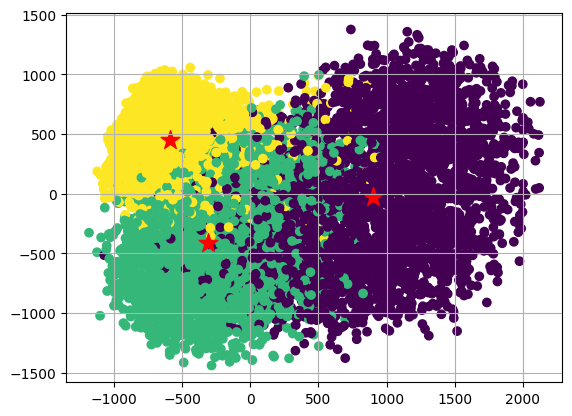

In [54]:
# Visualize clusters
plt.scatter(Z_k[0, :], Z_k[1, :], c=Y_train)

#Visualize centroid of each cluster
for i in digits:
    idx = (Y_train == i)
    cluster_i = Z_k[:, idx]
    C_digit = centroid(cluster_i)
    plt.scatter(C_digit[0, :], C_digit[1, :],marker="*", s=200, c=['red'])
plt.grid()

plt.show()

### 1.6) Compute, for each cluster, the average distance from the centroid. Comment the result

In [55]:
# Compute centroids for each cluster
centroids = {}
for i in digits:
    idx = (Y_train == i)
    cluster_i = Z_k[:, idx]
    centroids[i] = centroid(cluster_i)

In [56]:
# For each cluster, average distance from the centroid
for digit in centroids.keys() :
    cluster_i = Z_k[:, (Y_train == digit)]
    avg_distance = 0
    m = cluster_i.shape[1]
    for k in range(0, m):
        avg_distance += np.linalg.norm(cluster_i[:,k] - centroids[digit])
    avg_distance /= m
    print(f"Average distance from the centroid for cluster {digit} : {'%.2f' % avg_distance}")


Average distance from the centroid for cluster 0 : 1676.37
Average distance from the centroid for cluster 6 : 767.64
Average distance from the centroid for cluster 9 : 1553.25


**As we can see from these result and from the scatter plot, the first class (purple one) is the most scattered one.**

### 1.7) Compute, for each cluster, the average distance from the centroid on the test set. Comment the results

In [57]:
# Centroid of the dataset
cX = centroid(X_test)

# Centered dataset
Xc = X_test - cX

# Projected dataset
# • U_k is from the train set
Z_k  = U_k.T @ Xc

# Compute centroids for each cluster
centroids = {}
for i in digits:
    idx = (Y_test == i)
    cluster_i = Z_k[:, idx]
    centroids[i] = centroid(cluster_i)

# For each cluster, average distance from the centroid
for digit in centroids.keys() :
    cluster_i = Z_k[:, (Y_test == digit)]
    avg_distance = 0
    m = cluster_i.shape[1]
    for k in range(0, m):
        avg_distance += np.linalg.norm(cluster_i[:,k] - centroids[digit])
    avg_distance /= m
    print(f"Average distance from the centroid for cluster {digit} : {'%.2f' % avg_distance}")


Average distance from the centroid for cluster 0 : 1697.54
Average distance from the centroid for cluster 6 : 751.20
Average distance from the centroid for cluster 9 : 1521.90


**As we can see from this results, the average distance from the centroid of the cluster using the test-set is very similar to the one obtained using the train-set.**

### 1.8) Define a classification algorithm in this way: given a new observation $x$, compute the distance between $x$ and each cluster centroid. Assign $x$ to the class corresponding the the closer centroid. Compute the accuracy of this algorithm on the test set and compute its accuracy

In [58]:
def classify(x, centroids):
    distances = {}
    for n in centroids.keys():
        x=np.reshape(x, (x.shape[0],1))
        distances[n] = np.linalg.norm(x - centroids[n])
    return min(distances, key=distances.get) 

In [59]:
XC = centroid(X_train)
X_test_c = X_test - XC
Z_test = U_k.T @ X_test_c
mis_number = 0
while i < X_test.shape[1]:
    if classify(Z_test[:, i], centroids) != Y_test[i]:
        mis_number += 1
    i +=1
print(f"Misclassification number: {mis_number / X_test.shape[1]:.4f}")

Misclassification number: 0.1374


### 1.9) Repeat this experiment for different values of $k$ and different digits. What do you observe?

In [60]:
# Different digits
D = ([0, 6, 9], [3, 8, 9], [0, 4, 7], [5, 6, 9], [1, 2, 4], [7, 5, 3])
# Different k
K = [2, 3, 4, 5, 7, 10, 15, 20, 30, 50, 100, 150]

(784, 12457) (12457,)


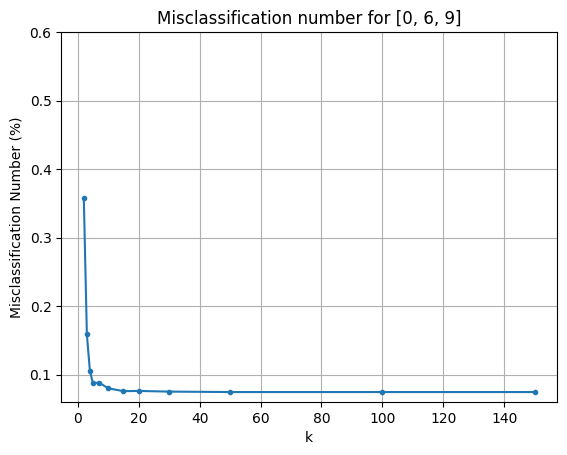

(784, 12602) (12602,)


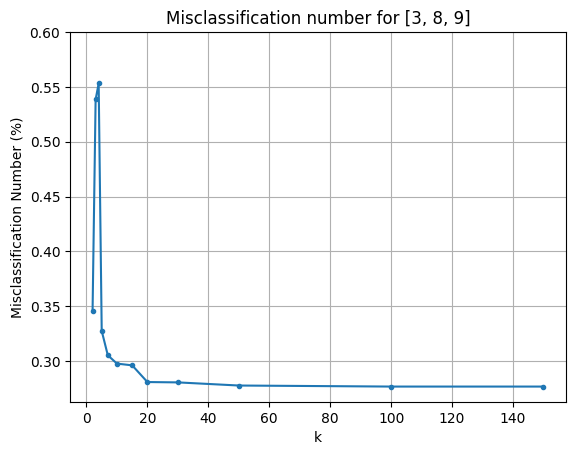

(784, 12605) (12605,)


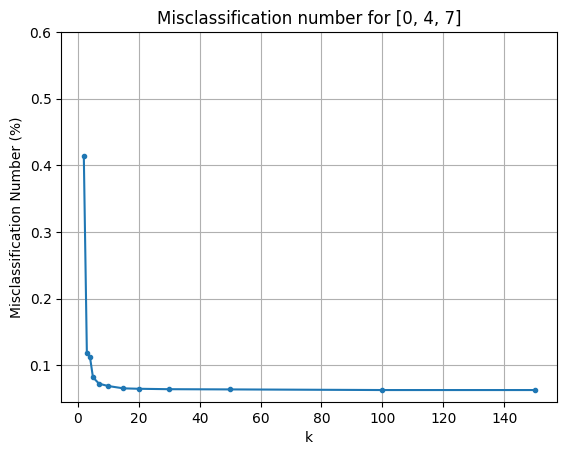

(784, 12120) (12120,)


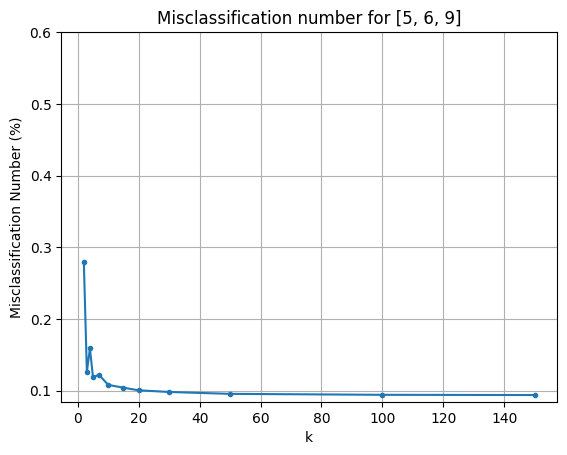

(784, 12933) (12933,)


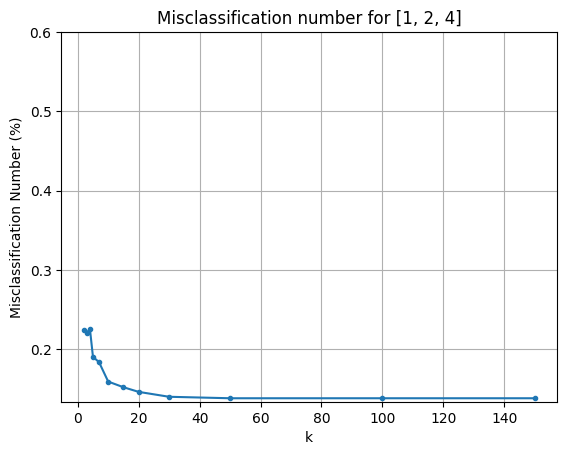

(784, 12547) (12547,)


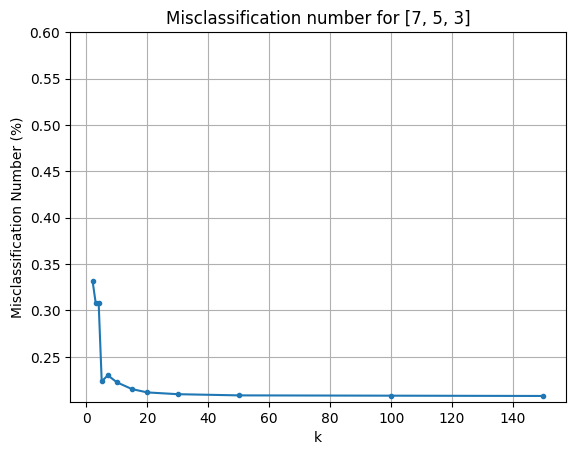

In [61]:
# Load dataset
dataset = pd.read_csv('./data.csv')
dataset = np.array(dataset)

for digits in D :
    # Split data and labels
    X = dataset[:, 1:].T
    Y = dataset[:, 0].T

    # Reduce the dataset
    idx = np.isin(Y,digits)
    Y = Y[idx]
    X = X[:, idx]
    d, N = X.shape
    print(X.shape, Y.shape)

    # Split train and test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, N, 0.75)

    # Centroid of the dataset
    cX = centroid(X_train)

    # Centered dataset
    Xc = X_train - cX

    # SVD of Xc
    U, s, VT = np.linalg.svd(Xc, full_matrices=False)

    mis_numbers = []
    for k in K :
        # Truncated SVD of Xc
        U_k = U[:, :k]

        # Projected dataset
        Z_k  = U_k.T @ Xc

        # Centroids computing
        centroids = {}
        for i in digits:
            idx = (Y_train == i)
            cluster_i = Z_k[:, idx]
            centroids[i] = centroid(cluster_i)
        
        # Projection of test set
        Z_test = U_k.T @ X_test
        mis_number = 0
        
        # Classification of test set
        while i < X_test.shape[1]:
            if classify(Z_test[:, i], centroids) != Y_test[i]:
                mis_number += 1
            i +=1
        mis_numbers.append(mis_number/ X_test.shape[1])

    # Plot misclassification varying k
    plt.plot(K, mis_numbers, '.-')
    plt.title(f'Misclassification number for {digits}')
    plt.grid()
    plt.xlabel('k')
    plt.ylabel('Misclassification Number (%)')
    plt.ylim(top=0.6)
    plt.show()

**The lower the misclassification number the higher the $k$**